# **[LEPL1109] - STATISTICS AND DATA SCIENCES**
## **Hackaton 02 - Classification: Diabetes Health indicators**
\
Prof. D. Hainaut\
Prod. L. Jacques\
\
\
Adrien Banse (adrien.banse@uclouvain.be)\
Jana Jovcheva (jana.jovcheva@uclouvain.be)\
François Lessage (francois.lessage@uclouvain.be)\
Sofiane Tanji (sofiane.tanji@uclouvain.be)

**Group 8:**  
- Tejada Morillas Théo | 1349-2200  
- Sanglier Kevin | 2383-2000  
- Clerbaux Coline | 6292-2200  
- Etlik Umit | 2930-2100  
- Burie Jarod | 2335-2100  
- t'Serstevens Victor | 8205-2000

![alt text](figures/diab_illustration.jpg)

<div class="alert alert-danger">
<b>[IMPORTANT] Read all the documentation</b>  <br>
    Make sure that you read the whole notebook, <b>and</b> the <code>README.md</code> file in the folder.
</div>

# **Guidelines and Deliverables**

*   This hackaton is due on the **29 November 2024 at 23h59**
*   Copying code or answers from other groups (or from the internet) is strictly forbidden. <b>Each source of inspiration (stack overflow, git, other groups, ChatGPT...) must be clearly indicated!</b>
*  This notebook (with the "ipynb" extension) file, the Python source file (".py"), the report (PDF format) and all other files that are necessary to run your code must be delivered on <b>Moodle</b>.
* Only the PDF report and the python source file will be graded, both on their content and the quality of the text / figures.
  * 4/10 for the code.
  * 4/10 for the Latex report.
  * 2/10 for the vizualisation. <br><br>

<div class="alert alert-info">
<b>[DELIVERABLE] Summary</b>  <br>
After the reading of this document (and playing with the code!), we expect you to provide us with:
<ol>
   <li> a PDF file (written in LaTeX, see example on Moodle) that answers all the questions below. The report should contain high quality figures with named axes (we recommend saving plots with the <samp>.pdf</samp> extension);
   <li> a Python file with your classifier implementation. Please follow the template that is provided and ensure it passes the so-called <i>sanity</i> tests;
   <li> this Jupyter Notebook (it will not be read, just checked for plagiarism);
   <li> and all other files (not the datasets!) we would need to run your code.
</ol>
</div>

As mentioned above, plagiarism is forbidden. However, we cannot forbid you to use artificial intelligence BUT we remind you that the aim of this project is to learn classification on your own and with the help of the course material. Finally, we remind you that for the same question, artificial intelligence presents similar solutions, which could be perceived as a form of plagiarism.

# **Context & Objective**
Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.\
Complications like heart disease, vision loss, lower-limb amputation, and kidney disease are associated with chronically high levels of sugar remaining in the bloodstream for those with diabetes. While there is no cure for diabetes, strategies like losing weight, eating healthily, being active, and receiving medical treatments can mitigate the harms of this disease in many patients. Early diagnosis can lead to lifestyle changes and more effective treatment, making predictive models for diabetes risk important tools for public and public health officials.

You work in the diabetology department at **Saint Luc University Hospital**. The head of the department has asked you to find a solution for classifying and predicting **whether patients are at high risk of developing diabetes**. This will enable them to schedule an appointment with these patients to set up prevention tools. To do this, you have a database of patients who have passed through the department in recent years. In addition, the head of the department feels that the poll is too long, and would like to **reduce the number of questions while maintaining the reliability and quality of the results**.\
Your aim is to determine which characteristics are relevant and enable reliable patient classification. Be careful, don’t let a potential diabetic patient slip through the cracks. The rest of this document will guide you in this process.

## **Dataset description**

 
The data set is a real-world data set based on a survey (BRFSS) conducted by the Centers for Disease Control and Prevention in the USA some ten years ago.\
The Behavioral Risk Factor Surveillance System (BRFSS) is an annual telephone health survey conducted by the Centers for Disease Control and Prevention. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic diseases and use of preventive services. The survey has been conducted annually since 1984. It contains 22 headings and around 70,000 entries.


<img src="figures/Features_table.png" alt="drawing" width="800"/>

## **Notebook structure**

* PART 1 - Preliminaries
   - 1.1 - Importing the packages
   - 1.2 - Importing the dataset
   - 1.3 - Is the dataset balanced?
   - 1.4 - Scale the dataset
    <br><br>
* PART 2 - Correlation
   - 2.1 - Correlation matrix 
   - 2.2 -Analyze the correlation with diabetes
   - 2.3 - Model selection and parameters tuning
   - 2.4 - Precision-Recall curve and thresholding
   <br><br>
* PART 3 - Classifiers
   - 3.1 - Linear regressor
   - 3.2 - Logisitic regressor
   - 3.3 - KNN regressor
   <br><br>
* PART 4 - Validation metrics
   - 4.1 - Precision score
   - 4.2 - Recall score
   - 4.3 - F1 score
   <br><br>
* PART 5 - Reduce the questionnaire size
   - 5.1 - K-Fold preparation
   - 5.2 - Find the right combination length/regressor
   - 5.3 - Visualize the scores
   <br><br>   
* PART 6 - Visualization
   - 6.1 - Visualize your results

We filled this notebook with preliminary (trivial) code. This practice makes possible to run each cell, even the last ones, without throwing warnings. <b>Take advantage of this aspect to divide the work between all team members!</b> <br><br>
Remember that many libraries exist in Python, so many functions have already been developed. Read the documentation and don't reinvent the wheel! You can import whatever you want.


<br><font size=7 color=#009999> <b>PART I - Preliminaries</b> </font> <br><br>

In this part of the hackathon, we will import the necessary packages, then we will import the dataset, scale it and analyze its distribution.

In [1]:
"""
CELL N°1.1 : IMPORTING ALL THE NECESSARY PACKAGES

@pre:  /
@post: The necessary packages should be loaded.
"""

import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import KFold
warnings.filterwarnings('ignore')
# Import all the necessary packages here...
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.metrics import precision_recall_curve, roc_curve, auc, average_precision_score

In [2]:
"""
CELL N°1.2 : IMPORTING THE DATASET

@pre:  /
@post: The object `df` should contain a Pandas DataFrame corresponding to the file `diabetes_dataset.csv`
"""

df = pd.read_csv('diabetes_dataset.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Diabetes       70692 non-null  float64
 1   HighBP         70692 non-null  float64
 2   HighChol       70692 non-null  float64
 3   CholCheck      70692 non-null  float64
 4   BMI            70692 non-null  float64
 5   Smoker         70692 non-null  float64
 6   Stroke         70692 non-null  float64
 7   HeartDisease   70692 non-null  float64
 8   PhysActivity   70692 non-null  float64
 9   Fruits         70692 non-null  float64
 10  Veggies        70692 non-null  float64
 11  Alcohol        70692 non-null  float64
 12  AnyHealthcare  70692 non-null  float64
 13  NoDocbcCost    70692 non-null  float64
 14  GenHlth        70692 non-null  float64
 15  MentHlth       70692 non-null  float64
 16  PhysHlth       70692 non-null  float64
 17  DiffWalk       70692 non-null  float64
 18  Sex   

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDisease,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


***Is the dataset balanced?***

It's good practice to check this to better understand the contents of our dataset. The balance between the different classes has an impact on the binarization threshold (which is initialized here at 0.5). Other things can also have an impact on the choice of threshold.

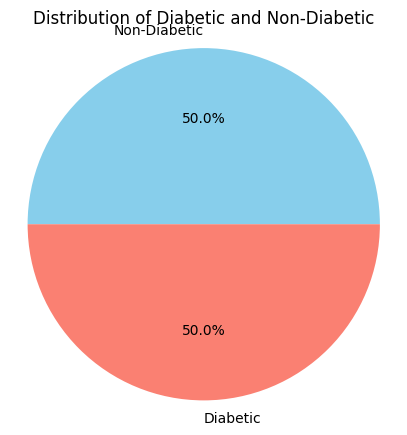

In [3]:
"""
CELL N°1.3 : IS THE DATASET BALANCED?

@pre:  `df` contains the dataset
@post: Plot the diabetic/non-diabetic distribution in a pie chart
"""

counts = df['Diabetes'].value_counts()

# Plot our pie chart
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=['Non-Diabetic', 'Diabetic'], colors=['skyblue', 'salmon'], autopct='%1.1f%%')
plt.title('Distribution of Diabetic and Non-Diabetic')
plt.axis('equal')
plt.show()

***Standardize*** is important when you work with data because it allows data to be compared with one another. 

$z$ is the standard score of a population $x$. It can be computed as follows:
$$z = \frac{x-\mu}{\sigma}$$
with $\mu$ the mean of the population and $\sigma$ the standard deviation of the poplutation.

Please consult, [Wikipedia](https://en.wikipedia.org/wiki/Standard_score) for further information about the standardization.\
Be careful to use the same formula as us, check in `scikit-learn`


In [4]:
"""
CELL N°1.4 : SCALE THE DATASET

@pre:  A pandas.DataFrame `df` containing the dataset
@post: A pandas.DataFrame `df` containing the standardized dataset (except classification columns (Diabetes))
"""

def scale_dataset(df):
    # We need to except classification columns (Diabetes) - see @post
    columns_to_exclude = ['Diabetes']
    
    # We can scale the others
    columns_to_scale = df.columns.difference(columns_to_exclude)
    scaler = StandardScaler()
    
    # Fit and transform the data
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    
    return df


df = scale_dataset(df)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Diabetes       70692 non-null  float64
 1   HighBP         70692 non-null  float64
 2   HighChol       70692 non-null  float64
 3   CholCheck      70692 non-null  float64
 4   BMI            70692 non-null  float64
 5   Smoker         70692 non-null  float64
 6   Stroke         70692 non-null  float64
 7   HeartDisease   70692 non-null  float64
 8   PhysActivity   70692 non-null  float64
 9   Fruits         70692 non-null  float64
 10  Veggies        70692 non-null  float64
 11  Alcohol        70692 non-null  float64
 12  AnyHealthcare  70692 non-null  float64
 13  NoDocbcCost    70692 non-null  float64
 14  GenHlth        70692 non-null  float64
 15  MentHlth       70692 non-null  float64
 16  PhysHlth       70692 non-null  float64
 17  DiffWalk       70692 non-null  float64
 18  Sex   

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDisease,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,...,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04
mean,0.500000,1.286560e-17,-9.649197e-17,2.106741e-16,-7.719358e-17,-7.819870e-17,1.849429e-17,-3.377219e-17,1.447380e-17,8.523457e-17,...,-1.045330e-16,-1.567994e-17,2.508791e-16,3.216399e-18,-6.432798e-17,-2.573119e-17,1.141822e-16,2.959087e-16,-9.005917e-17,3.216399e-17
std,0.500004,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,...,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,0.000000,-1.136104e+00,-1.052798e+00,-6.278417e+00,-2.510153e+00,-9.517105e-01,-2.574735e-01,-4.164703e-01,-1.538638e+00,-1.255371e+00,...,-4.604591e+00,-3.219449e-01,-1.649743e+00,-4.600583e-01,-5.774506e-01,-5.815537e-01,-9.173925e-01,-2.659082e+00,-3.810178e+00,-2.159964e+00
25%,0.000000,-1.136104e+00,-1.052798e+00,1.592758e-01,-6.827454e-01,-9.517105e-01,-2.574735e-01,-4.164703e-01,-1.538638e+00,-1.255371e+00,...,2.171745e-01,-3.219449e-01,-7.517193e-01,-4.600583e-01,-5.774506e-01,-5.815537e-01,-9.173925e-01,-5.553930e-01,-8.949340e-01,-7.807678e-01
50%,0.500000,8.802011e-01,9.498498e-01,1.592758e-01,-1.204662e-01,-9.517105e-01,-2.574735e-01,-4.164703e-01,6.499253e-01,7.965770e-01,...,2.171745e-01,-3.219449e-01,1.463042e-01,-4.600583e-01,-5.774506e-01,-5.815537e-01,-9.173925e-01,1.458365e-01,7.681388e-02,1.386961e-01
75%,1.000000,8.802011e-01,9.498498e-01,1.592758e-01,4.418130e-01,1.050740e+00,-2.574735e-01,-4.164703e-01,6.499253e-01,7.965770e-01,...,2.171745e-01,-3.219449e-01,1.044328e+00,-2.148271e-01,1.884113e-02,1.719532e+00,1.090046e+00,8.470661e-01,1.048562e+00,1.058160e+00
max,1.000000,8.802011e-01,9.498498e-01,1.592758e-01,9.578850e+00,1.050740e+00,3.883895e+00,2.401131e+00,6.499253e-01,7.965770e-01,...,2.171745e-01,3.106121e+00,1.942351e+00,3.218410e+00,2.404008e+00,1.719532e+00,1.090046e+00,1.548296e+00,1.048562e+00,1.058160e+00


<br><font size=7 color=#009999> <b>PART II - Correlation</b> </font> <br><br>

***In order to keep*** the important features for our classification, we can compute and plot (see e.g. `seaborn.heatmap`) the correlation matrix. With these correlation coefficient, we can establish a feature selection strategy.\
Be sure to use the `pearson` correlation.


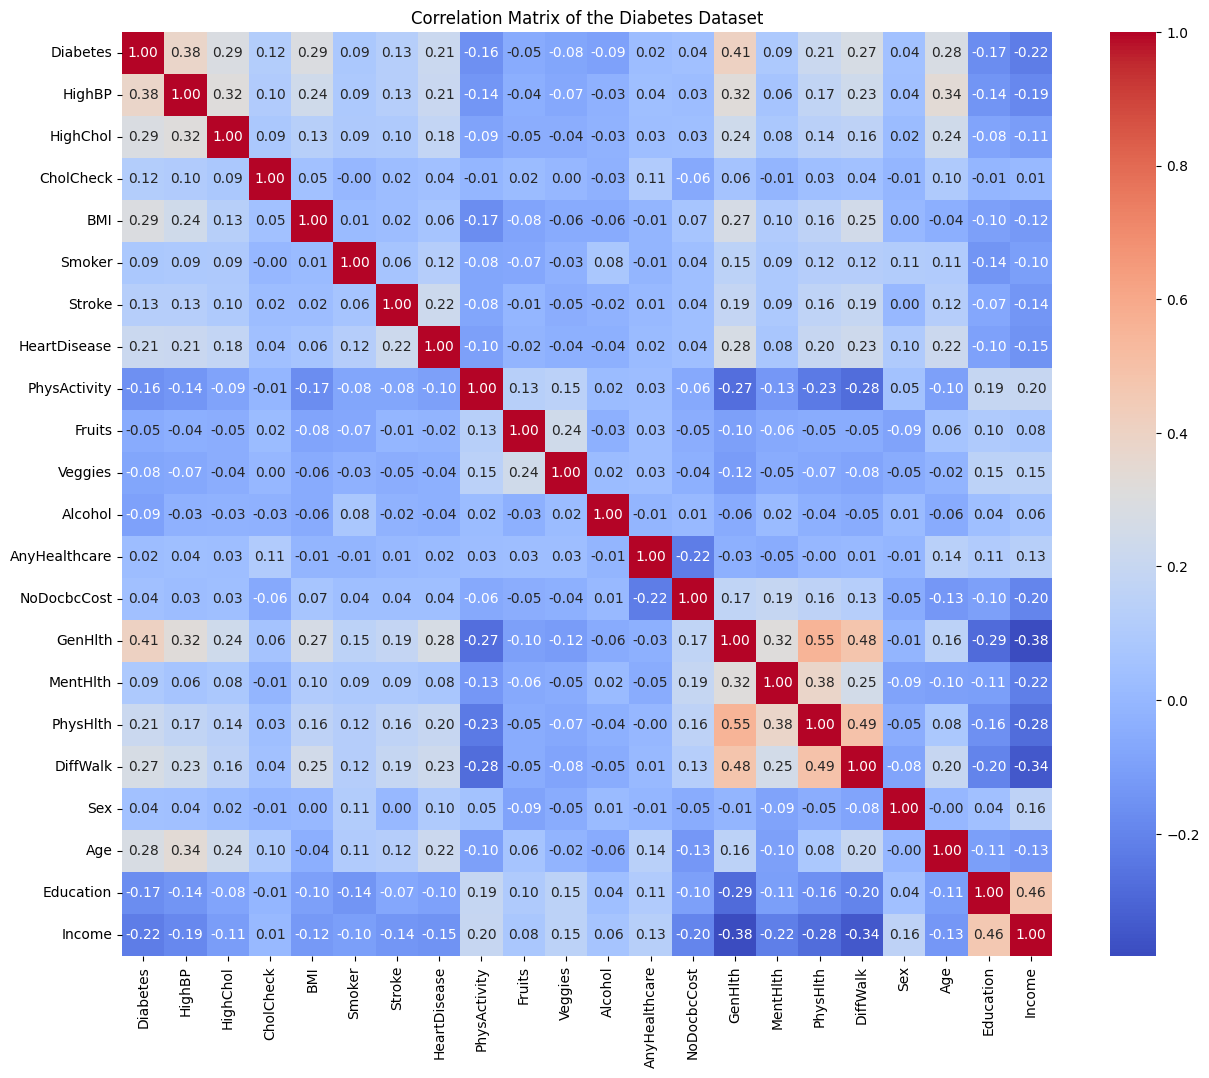

In [5]:
"""
CELL N°2.1 : CORRELATION MATRIX

@pre:  `df` contains the diabetes dataset
@post: `corr_matrix` is a Pandas DataFrame that contains the correlation matrix of the full dataset
"""

# We set the method paramet to "pearson" - see instructions
corr_matrix = df.corr(method='pearson')

# Plot the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of the Diabetes Dataset')
plt.show()

After this visualization, it is time to sort the coefficients of correlation to keep them with the best correlation with `Diabetes`. **Be careful** with the sign.

In [6]:
"""
CELL N°2.2 : ANALYZE THE CORRELATION WITH DIABETE

@pre:  `corr_matrix` is a Pandas DataFrame that contains the correlation matrix of the training set
@post: `sorted_features` contains a list of features (columns of `df`) 
       sorted according to their correlation with `Diabetes` 
"""

def sort_features(corr_matrix):
    # We need to extract the correlation of each feature with 'Diabetes', so we can exclude 'Diabetes' itself
    corr_with_diabetes = corr_matrix['Diabetes'].drop('Diabetes')
    
    # Now we can sort features based on the absolute value of their correlation coefficients (in descending order)
    sorted_corr = corr_with_diabetes.abs().sort_values(ascending=False)
    
    # For debug
    # print(sorted_corr)
    # print(list(sorted_corr.index))

    return list(sorted_corr.index)

sorted_features = sort_features(corr_matrix)

<br><font size=7 color=#009999> <b>PART III - Classifiers</b> </font> <br><br>

In this third part, you need to write functions that return a lamba function with a classifier for the test set. **Be careful** to keep the same form as the one suggested to pass the sanity checks.

**Implement** the *linear_regressor*. Please follow the specifications in the provided template.

**Reminder:** Linear regressor is a model that predicts a continuous value by fitting a line (or hyperplane) to the data, minimizing the difference between observed and predicted values.

Please consult, [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression) for further information about the classifier.

In [7]:
"""
CELL N°3.1 : LINEAR REGRESSOR

@pre:  `X_train` and `y_train` contain the training set of `df` and a threshold that is a numerical value (float) by default 0.5.
@post: Lambda function that takes `X_test` and returns a 1D array of binary predictions (0 or 1) according to the given threshold.
"""


def linear_regressor(X_train, y_train, threshold=0.5):
    return lambda X_test: (LinearRegression().fit(X_train, y_train).predict(X_test) >= threshold) * 1.0

**Implement** the *logistic_regressor*. Please follow the specifications in the provided template.

**Reminder:** Logisitic regressor is a classification model that estimates the probability of an observation belonging to a class using a logistic function; suitable for binary (and multiclass) problems.

Please consult, [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression) for further information about the classifier.

In [8]:
"""
CELL N°3.2 : LOGISTIC REGRESSOR

@pre:  `X_train` and `y_train` contain the training set of `df` and a threshold that is a numerical value (float) by default 0.5.
@post:  Lambda function that takes `X_test` and returns a 1D array of binary predictions (0 or 1) according to the given threshold.
"""


def logistic_regressor(X_train, y_train, threshold=0.5):
    # We use predict_proba here because logistic regression provides probabilities!
    return lambda X_test: (LogisticRegression().fit(X_train, y_train).predict_proba(X_test)[:, 1] >= threshold) * 1.0

**Implement** the *knn_regressor*. Please follow the specifications in the provided template.  <br>

**Reminder:** Knn regressor is a non-parametric classification algorithm that classifies an observation according to the classes of its k nearest neighbors in feature space.

Please consult, [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) for further information about the classifier.\
Attention, you must implement it with **Euclidian distance** and **10** neighbors.

In [9]:
"""
CELL N°3.3 : KNN REGRESSOR

@pre:  `X_train` and `y_train` contain the training set of `df` and a threshold that is a numerical value (float) by default 0.5.
@post: Lambda function that takes `X_test` and returns a 1D array of binary predictions (0 or 1) according to the given threshold.
"""


def knn_regressor(X_train, y_train, threshold=0.5, n_neighbors=10):
    return lambda X_test: (KNeighborsRegressor(n_neighbors=n_neighbors, metric='euclidean').fit(X_train, y_train).predict(X_test) >= threshold) * 1.0

<br><font size=7 color=#009999> <b>PART IV - Validation metrics</b> </font> <br><br>

In this part, we will implement tools that will help us to **validate** the prediction models implemented in Part III. In particular, we will use the _precision, recall_ and _F1 score_ metrics. 

**Implement** the _precision, recall_ and _F1 score_. Please follow the specifications in the provided template.  <br>

**Reminder**

$F_1$ is a performance metric allowing to obtain some trade-off between the precision and recall criterions. It can be computed as follows:
$$F_1 = 2~\frac{\mathrm{precision} \cdot \mathrm{recall}}{\mathrm{precision} + \mathrm{recall}}.$$

Please consult, [Wikipedia](https://en.wikipedia.org/wiki/F-score) for further information about the three metrics.

In [10]:
"""
CELL N°4.1 : PRECISION SCORE

@pre:  /
@post: `precision(y_test, y_pred)` returns the prediction metric based on the predicted labels `y_pred`
       and the true labels `y_test`. 
"""


def precision(y_test, y_pred):
    # We can use precision_score() from sklearn.metrics
    # Or our implementation based on the course:

    # Calculate the True Positives (TP) and the False Positives (FP)
    TP = np.sum((y_pred == 1) & (y_test == 1))
    FP = np.sum((y_pred == 1) & (y_test == 0))

    # Avoid division by 0
    if TP + FP == 0:
        return 0.0

    # Compute our precision
    return TP / (TP + FP)

In [11]:
"""
CELL N°4.2 : RECALL SCORE

@pre:  /
@post: `recall(y_test, y_pred)` returns the recall metric based on the predicted labels `y_pred`
       and the true labels `y_test`. 
"""


def recall(y_test, y_pred):
    # We can use recall_score() from sklearn.metrics
    # Or our implementation based on the course:

    # Calculate the True Positives (TP) and the False Negatives (FN)
    TP = np.sum((y_pred == 1) & (y_test == 1))
    FN = np.sum((y_pred == 0) & (y_test == 1))

    # Avoid division by 0
    if TP + FN == 0:
        return 0.0

    # Compute our recall
    return TP / (TP + FN)

In [12]:
"""
CELL N°4.3 : F1 SCORE

@pre:  /
@post: `f1_score(y_test, y_pred)` returns the F1 score metric based on the predicted labels `y_pred`
       and the true labels `y_test`. 
"""


def f1_score(y_test, y_pred):
    # We can use f1_score() from sklearn.metrics
    # Or our implementation based on the course:

    # First, we need to compute the precision and the recall using our previously defined functions
    prec = precision(y_test, y_pred)
    rec = recall(y_test, y_pred)

    # Avoid division by 0
    if prec + rec == 0:
        return 0.0

    # Finally, we can compute our F1 score using the reminder - see instructions
    return 2 * (prec * rec) / (prec + rec)

<br><font size=7 color=#009999> <b>PART V - Reduce the questionnaire size</b> </font> <br><br>

In this part, find a model that satisfies the following specifications: 
- A recall of at least 95%
- A F1 score of at least 75%

For that, we will use **k-fold** cross validation (see [the Wikipedia page](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation) for a reminder), and then test the three models above with 
- Different number of features
- Different thresholds

In order to use k-fold cross validation, use the class `sklearn.model_selection.KFold` from the `scikit-learn` library (see [the documentation](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.KFold.html)) with `n_splits = 3`.

<div class="alert alert-danger">
<b>[IMPORTANT] Grading</b>  <br>
In order for us to be able to automatically grade your submission, put <code>shuffle=True</code>, and <code>random_state=1109</code> when you initialize <code>KFold</code>.
</div>

In [13]:
"""
CELL N°5.1 : K-FOLD PREPARATION

@pre:  `df` contains the scaled dataset.
@post: The following specifications should be satisfied: 
            - `kf` should contain a `KFold` object with 3 splits, shuffled and with 1109 seed. 
            - `X` should contain a pd.DataFrame with all the features (all columns except `Diabetes`)
            - `y` should contain a pd.DataFrame with all the labels (only the column `Diabetes`)
"""

kf = KFold(n_splits=3, shuffle=True, random_state=1109) # see instructions for parameters
X = df.drop(columns=['Diabetes']) # see @post - (all columns except `Diabetes`)
y = df['Diabetes'] # see @post - (only the column `Diabetes`)

In order to find our model, proceed as follows: 
- Fix a threshold in $(0, 1)$
- Define a dictionary `result` of the form 

<code>result = {
    "linear": {}, 
    "logistic": {}, 
    "knn": {}
}
</code>

- For $ i \in \{1, \dots, \texttt{N\_features}\} $: 
    - Select the $i$ **most correlated features** (use `sorted_features` defined above)
    - For all the pairs $((X_{\text{train}}, y_{\text{train}}), (X_{\text{test}}, y_{\text{test}}))$ given by k-fold
        - Compute the linear, logistic and KNN regressors with the fixed threshold on $X_{\text{train}}$
        - Compute the 3 different 3-tuple `validation(regressor, X_test, y_test)`
    - In `result[reg][i]`, save the **average** of all the validation tuples you computed for `reg`

In [14]:
"""
CELL N°5.2 : FIND THE RIGHT COMBINATION LENGTH/REGRESSOR

@pre:  `kf`, `X` and `y` are defined such as in the @post of CELL 5.1. 
@post: `result` is such that `result[reg][i]` contains the average of the validations for regressor `reg`, 
       when keeping the `i` most correlated features
"""


def validation(regressor, X_test, y_test):
    # Nothing to do here!
    y_pred = regressor(X_test)
    return (recall(y_test, y_pred), precision(y_test, y_pred), f1_score(y_test, y_pred))


threshold = 0.28 # Adjust the threshold to get the best results
result = {
    "linear": {},
    "logistic": {},
    "knn": {}
}

# Iterate over the number of features to be selected
for i in range(1, len(X.columns) + 1):
    linear_reg = []
    logistic_reg = []
    knn_reg = []

    # Select the top i most correlated features
    selected_features = sorted_features[:i]
    X_f = X[selected_features]

    # Perform k-fold cross-validation
    for train_index, test_index in kf.split(X_f):
        X_train, X_test = X_f.iloc[train_index].values, X_f.iloc[test_index].values
        y_train, y_test = y.iloc[train_index].values, y.iloc[test_index].values

        # Predict using each regressor
        linear_pred = linear_regressor(X_train, y_train, threshold)(X_test)
        logistic_pred = logistic_regressor(X_train, y_train, threshold)(X_test)
        knn_pred = knn_regressor(X_train, y_train, threshold)(X_test)

        # Validate the predictions and store the results
        linear_reg.append(validation(lambda X_f: linear_pred, X_test, y_test))
        logistic_reg.append(validation(lambda X_f: logistic_pred, X_test, y_test))
        knn_reg.append(validation(lambda X_f: knn_pred, X_test, y_test))

    # Store the average validation results for each regressor
    result["linear"][i] = np.mean(linear_reg, axis=0)
    result["logistic"][i] = np.mean(logistic_reg, axis=0)
    result["knn"][i] = np.mean(knn_reg, axis=0)

The following cell allows you to test if the threshold that you chose satisfies the specifications, that are 
- A recall of at least 95%
- A F1 score of at least 75%

Plot these graphs for different threshold, and select the model **with the smallest number of questions** that satisfy the conditions above.

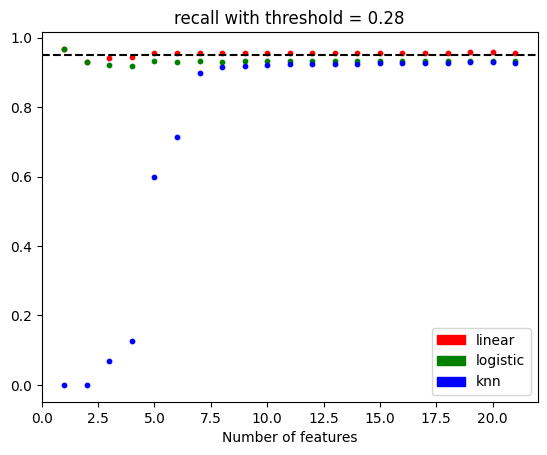

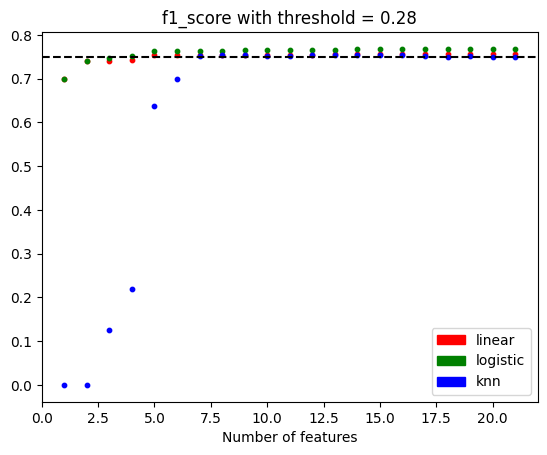

In [15]:
"""
CELL N°5.3 : VISUALIZE THE SCORES

@pre:  `result` contains the average of the validations for regressor `reg`, when keeping the `i` most correlated features
@post: plot of the scores for each condition
"""

# Nothing to do here, just run me!

from helper import plot_result
plot_result(result, threshold, to_show="recall")
plot_result(result, threshold, to_show="f1_score")

<br><font size=7 color=#009999> <b>PART VI - Visualization</b> </font> <br><br>

In this part, you are asked to produce a **clear and clean figure** expressing a result
or giving an overall vision of your work for this hackaton. **Please feel free to do as you
wish. Be original!** 

The **clarity**, **content** and **description** (in the report) of your figure will be evaluated.

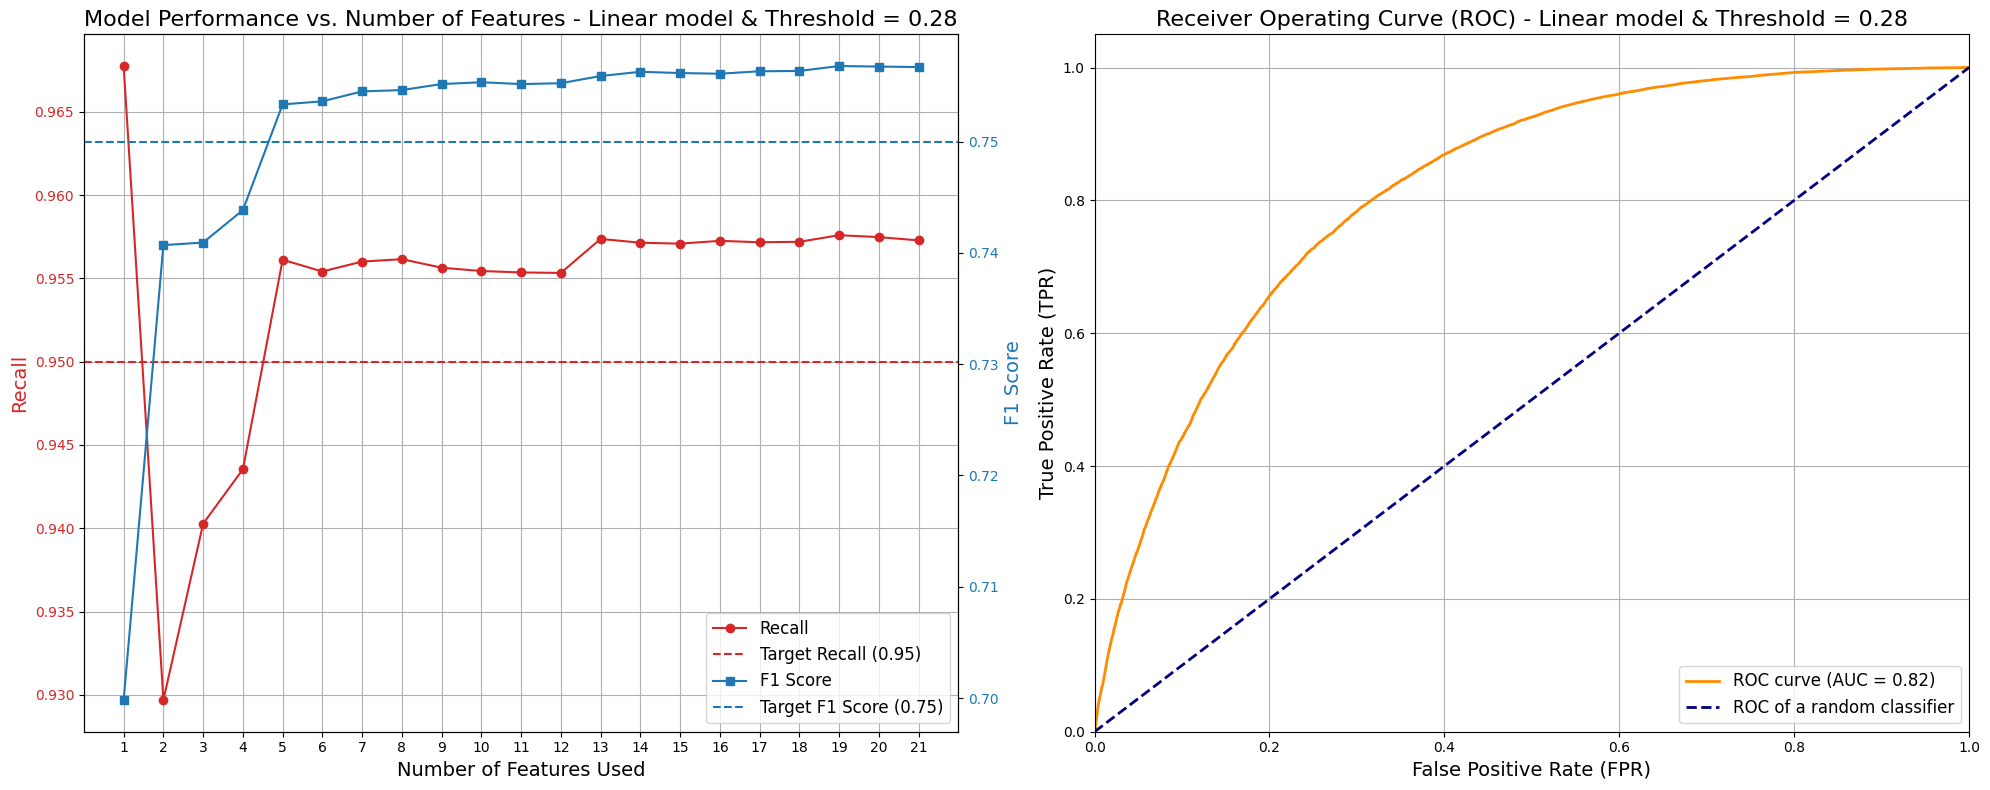

In [16]:
"""
CELL N°6.1 : VISUALIZE YOUR RESULTS

@pre:  /
@post: /
"""

# We decided to visualize how the recall and F1 score vary with the number of features
# for the linear regressor at threshold 0.28. Since our goal was to achieve a recall of at least 95% and an F1 score of at least 75%,
# this plot helps us understand how the model's performance changes as we include more features

# Our number of features
features = list(range(1, len(sorted_features) + 1))
model_name = 'linear'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

###########################################################
# First subplot: Recall and F1 Score vs. Number of Features
###########################################################

# Extract recall and F1 scores for each number of features with list comprehension
recall_scores = [result[model_name][i][0] for i in features]
f1_scores = [result[model_name][i][2] for i in features]

# Plot recall scores
color = 'tab:red'
ax1.set_xlabel('Number of Features Used', fontsize=14)
ax1.set_ylabel('Recall', color=color, fontsize=14)
ax1.plot(features, recall_scores, marker='o', linestyle='-', color=color, label='Recall')
ax1.tick_params(axis='y', labelcolor=color)
ax1.axhline(y=0.95, color=color, linestyle='--', label='Target Recall (0.95)')

# Plot F1 scores
ax1_2 = ax1.twinx()
color = 'tab:blue'
ax1_2.set_ylabel('F1 Score', color=color, fontsize=14)
ax1_2.plot(features, f1_scores, marker='s', linestyle='-', color=color, label='F1 Score')
ax1_2.tick_params(axis='y', labelcolor=color)
ax1_2.axhline(y=0.75, color=color, linestyle='--', label='Target F1 Score (0.75)')

# Define our title/labels & legend
ax1.set_xticks(features)
ax1.set_title('Model Performance vs. Number of Features - Linear model & Threshold = 0.28', fontsize=16)
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax1_2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='lower right', fontsize=12)
ax1.grid(True)

###################################
# Second subplot: ROC Curve and AUC
###################################

# We decided to enhance our visualization by adding a second subplot that displays the ROC curve and computes the AUC (Area Under the Curve)
# for our linear regression model. This allows us to deepen our understanding of the concepts we learned earlier this week.
# This also allows us to explore whether our dataset confirms the guidelines from the course:

# PR or ROC curves?
# PR: rare "P"s, unbalanced classes, or FPs matter more than FNs
# ROC: better otherwise

# Since our dataset is fully balanced -- see part 1 (50% diabetic & 50% non-diabetic),
# it is interesting to compare both curves and see which one gives us more insight into our model's performance.

# For ROC curve we need to collect true positive rates (TPR) and false positive rates (FPR)
optimal_features = 5  # what we found in the part 5
selected_features = sorted_features[:optimal_features]
X_f = X[selected_features]
y_tests = []
y_scores = []

# Perform a new k-fold cross-validation
for train_index, test_index in kf.split(X_f):
    X_train, X_test = X_f.iloc[train_index], X_f.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Here we train the linear regression model
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)

    # now we get the predicted scores
    y_score = linear_model.predict(X_test)

    # and finally we get the true labels and predicted scores
    y_tests.extend(y_test)
    y_scores.extend(y_score)

# Here we compute and plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_tests, y_scores)
roc_auc = auc(fpr, tpr)  # compute our AUC
ax2.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='ROC of a random classifier')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])

# Define our title/labels & legend
ax2.set_xlabel('False Positive Rate (FPR)', fontsize=14)
ax2.set_ylabel('True Positive Rate (TPR)', fontsize=14)
ax2.set_title('Receiver Operating Curve (ROC) - Linear model & Threshold = 0.28', fontsize=16)
ax2.legend(loc="lower right", fontsize=12)
ax2.grid(True)

plt.tight_layout()
plt.show()